# Chapter 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://assets.datacamp.com/production/repositories/4976/datasets/252c7d50740da7988d71174d15184247463d975c/telco.csv'
telco_df = pd.read_csv(url)
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
from sklearn.preprocessing import StandardScaler

target = ['Churn']
custid = ['customerID']

def clean_telco(df, target=['Churn'], custid=['customerID']):
    
    # Turn target into binary
    y = df[target[0]].replace({'Yes': 1, 'No':0})
    
    # Clean total charges, and turn to float
    df['TotalCharges'].replace({' ': 0}, inplace=True)
    df['TotalCharges'] = df['TotalCharges'].astype('float')

    # Remove target and customerid
    df.drop(target+custid, axis=1, inplace=True)
    
    # Separate columns into categorical and numerical
    categorical = df.nunique()[df.nunique()<10].keys().tolist()
    numerical = [col for col in df.columns if col not in categorical]

    # scale numerical data
    scaler = StandardScaler()
    scale_numerical = scaler.fit_transform(df[numerical])
    scale_numerical = pd.DataFrame(scale_numerical, columns=numerical)
    
    # One hot encode categorical
    cat_df = pd.get_dummies(df[categorical])
    
    # merge
    X = pd.merge(cat_df, scale_numerical,
                 how='left',
                 left_index=True, right_index=True)
    Xy = pd.merge(X, y, how='left',
                  left_index=True,
                  right_index=True)
    
    return Xy

In [3]:
Xy = clean_telco(telco_df.copy())
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   gender_Female                            7043 non-null   uint8  
 2   gender_Male                              7043 non-null   uint8  
 3   Partner_No                               7043 non-null   uint8  
 4   Partner_Yes                              7043 non-null   uint8  
 5   Dependents_No                            7043 non-null   uint8  
 6   Dependents_Yes                           7043 non-null   uint8  
 7   PhoneService_No                          7043 non-null   uint8  
 8   PhoneService_Yes                         7043 non-null   uint8  
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

In [4]:
telcom = Xy.copy()

In [5]:
# Print the unique Churn values
print(set(telcom['Churn']))

# Calculate the ratio size of each churn group
telcom.groupby(['Churn']).size() / telcom.shape[0] * 100

# Import the function for splitting data to train and test
from sklearn.model_selection import train_test_split

# Split the data into train and test
train, test = train_test_split(telcom, test_size = .25)

{0, 1}


In [6]:
# Store column names from `telcom` excluding target variable and customer ID
cols = [col for col in telcom.columns if col not in custid + target]

# Extract training features
train_X = train[cols]

# Extract training target
train_Y = train[target]

# Extract testing features
test_X = test[cols]

# Extract testing target
test_Y = test[target]

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

In [8]:
# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.8047


/home/bosullivan/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.799


/home/bosullivan/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
from sklearn.metrics import recall_score

C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]

l1_metrics = np.array([[c, 0.0, 0.0] for c in C])

l1_metrics

array([[1.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.    ],
       [0.25  , 0.    , 0.    ],
       [0.1   , 0.    , 0.    ],
       [0.05  , 0.    , 0.    ],
       [0.025 , 0.    , 0.    ],
       [0.01  , 0.    , 0.    ],
       [0.005 , 0.    , 0.    ],
       [0.0025, 0.    , 0.    ]])

In [11]:
# Run a for loop over the range of C list length
for index in range(0, len(C)):
    # Initialize and fit Logistic Regression with the C candidate
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X, train_Y.iloc[:, 0])
    # Predict churn on the testing data
    pred_test_Y = logreg.predict(test_X)
    # Create non-zero count and recall score columns
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs    Recall
0  1.0000             27.0  0.560091
1  0.5000             26.0  0.555556
2  0.2500             22.0  0.555556
3  0.1000             20.0  0.546485
4  0.0500             16.0  0.530612
5  0.0250             15.0  0.507937
6  0.0100              8.0  0.428571
7  0.0050              3.0  0.344671
8  0.0025              2.0  0.038549


In [12]:
import sklearn.tree as tree

In [13]:
# Initialize decision tree classifier
mytree = tree.DecisionTreeClassifier()

# Fit the decision tree on training data
mytree.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = mytree.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7252


In [14]:
from sklearn.tree import DecisionTreeClassifier

depth_list = list(range(2,15))
depth_tuning = np.array([ [depth, 0.0] for depth in depth_list])

In [15]:
# Run a for loop over the range of depth list length
for index in range(0, len(depth_list)):
  # Initialize and fit decision tree with the `max_depth` candidate
  mytree = DecisionTreeClassifier(max_depth=depth_list[index])
  mytree.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = mytree.predict(test_X)
  # Calculate the recall score 
  depth_tuning[index,1] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['Max_Depth','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth    Recall
0         2.0  0.616780
1         3.0  0.349206
2         4.0  0.630385
3         5.0  0.621315
4         6.0  0.566893
5         7.0  0.532880
6         8.0  0.535147
7         9.0  0.512472
8        10.0  0.587302
9        11.0  0.537415
10       12.0  0.548753
11       13.0  0.569161
12       14.0  0.548753


In [16]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(test_X.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

           Feature  Coefficient  Exp_Coefficient
42          tenure    -0.421011         0.656383
43  MonthlyCharges     0.163873         1.178064


In [18]:
import graphviz

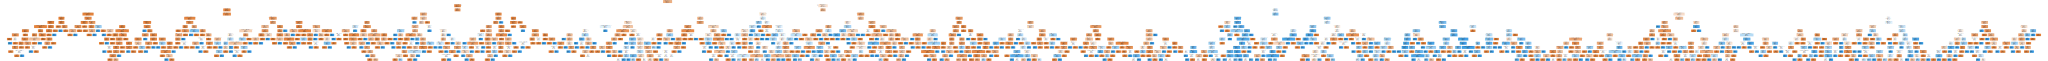

In [19]:
# Export graphviz object from the trained decision tree 
exported = tree.export_graphviz(decision_tree=mytree, 
			# Assign feature names
            out_file=None, feature_names=train_X.columns, 
			# Set precision to 1 and add class names
			precision=1, class_names=['Not churn','Churn'], filled = True)

# Call the Source function and pass the exported graphviz object
graph = graphviz.Source(exported)

# Display the decision tree
#display_image("/usr/local/share/datasets/decision_tree_rules.png")
display(graph)